In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import random

Load Dataset 

In [4]:
#max pooling layer-> reduces spatial dimension helps to dec computational load, and extract the dominant features
#conv2d->  layer to apply 2d convolutional operations
#dense-> where each input node is connected to every output node (fully connected layer)
#flatten-> converts multidim data(like images) into 1d, to fed into fully connected layers, example 29x28-> 784 element vector

In [7]:
x_train= np.loadtxt("/Users/Reyikarthik/Desktop/CNN/Image Classification CNN Keras Dataset/input.csv", delimiter =',')
y_train= np.loadtxt('/Users/Reyikarthik/Desktop/CNN/Image Classification CNN Keras Dataset/labels.csv', delimiter= ',')

x_test= np.loadtxt('/Users/Reyikarthik/Desktop/CNN/Image Classification CNN Keras Dataset/input_test.csv', delimiter =',')
y_test=np.loadtxt('/Users/Reyikarthik/Desktop/CNN/Image Classification CNN Keras Dataset/labels_test.csv', delimiter =',')


In [9]:
print('shape of x_train:', x_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of x_test:', x_test.shape)
print('shape of y_test:', y_test.shape)

shape of x_train: (2000, 30000)
shape of y_train: (2000,)
shape of x_test: (400, 30000)
shape of y_test: (400,)


here the shape-> 2000, means 2000 number of images i have and 30000 means 100x100x3

In [11]:
 #reshaping the train and test data
x_train= x_train .reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test= x_test .reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)



but when we fit the data inside the model we have to reshape it, hence we did here

In [13]:
print('shape of x_train:', x_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of x_test:', x_test.shape)
print('shape of y_test:', y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of x_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


In [14]:
#checking the single image data
x_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

#note the values for each image is between 0 to 255, which is typical rgb values

In [16]:
#To train our model properly we need to rescale the values between 0 to 1

 Normalization

In [18]:
x_train= x_train/255.0
x_test= x_test/255.0

In [19]:
#now the values are normalised 
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

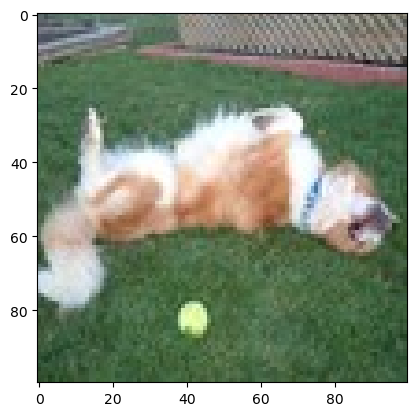

In [28]:
#displaying one image
idx= random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

Working with Keras

In [32]:
#sequential: means the layers are going to stacked up, i.e. 1st convolutional layer, then max pooling layer, then again next conv layer, and max pooling layer and so on, then couple of fully connected layers 

Model

In [35]:
model= Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten()) #flatten 2d feature map into 1d vector, it prepares the data for fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [39]:
#i can use stochastic gradient descent, for that i have to assign some learning rate
#opt = keras.optimizers.SGD(learning_rate= 0.001)
#model.compile(loss= 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [41]:
#training the input data
model.fit(x_train, y_train, epochs= 10, batch_size= 64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.5476 - loss: 1.6758
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.5922 - loss: 0.6703
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.6924 - loss: 0.5869
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.7114 - loss: 0.5404
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.7863 - loss: 0.4499
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.8428 - loss: 0.3333
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.8887 - loss: 0.2625
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.9255 - loss: 0.1754
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.9636 - loss: 0.1117
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.9654 - loss: 0.0875


in each epoch, the loss value is decreasing and the accuracy is increasing

In [31]:
'''note: if i increase the epochs from 5 to 10 (say), 
if i don't compile the model, instead just resume the training, it will start with the 5th acuracy and increase from that.
example, at 5th epoch, acc= 71%, hence 1st epoch when epoch set to 10, it will be 78%'''

"note: if i increase the epochs from 5 to 10 (say), \nif i don't compile the model, instead just resume the training, it will start with the 5th acuracy and increase from that.\nexample, at 5th epoch, acc= 71%, hence 1st epoch when epoch set to 10, it will be 78%"

In [32]:
#let's evaluate model's performance on the test dataset 
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6160 - loss: 0.7426


[0.6422576904296875, 0.6825000047683716]

In [33]:
#this acc -> 65% is very low, because the dataset is very small.
#if play around the dataset more, and model more, i can get better accuracy

#making predictions

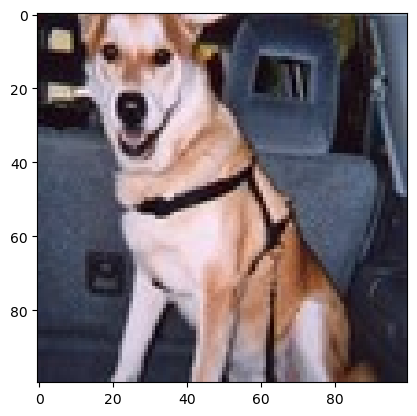

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[0.11831156]]
our model says it is:  karthik


In [137]:
#generating random values from the y_test
idx2= random.randint(0, len(y_test))
plt.imshow(x_test[idx2, : ])
plt.show()

#i am predicting the probability value for the same image as it shown above from the x_test data
y_pred= model.predict(x_test[idx2, : ].reshape(1,100,100,3))
print(y_pred)

#if the prob value is greater than 0.5 than it will be 1 else 0
y_pred= y_pred>0.5


#i am saying 0-> dog, 1 as cat
if (y_pred == 0):
    pred= 'dog'
else:
    pred= 'cat'

print('our model says it is: ', pred)

In [71]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 2.2 MB/s eta 0:00:0000:0100:01


In [73]:
pip install opencv-contrib-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 MB 3.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [75]:
import cv2
print(cv2.__version__)  # This will print the installed OpenCV version


4.10.0


In [77]:
test_img= cv2.imread('/Users/Reyikarthik/Desktop/CNN/premium_photo-1673967831980-1d377baaded2.jpeg')

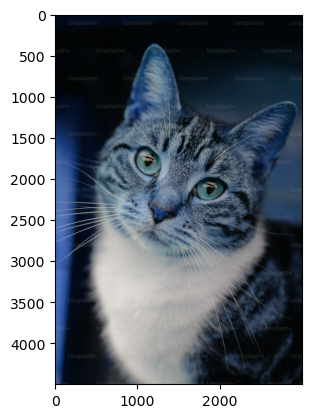

In [79]:
plt.imshow(test_img)

In [81]:
test_img.shape

(4499, 3000, 3)

In [85]:
test_img=cv2.resize(test_img,(256,256)) #resizing it

In [87]:
#as we pass data into batches hence now i am passing only 1 image therfore putting this image inside 4d tensor
#test_input= test_img.reshape((1,256,256,3))